#Utilities

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json, os, re, time,regex
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from natsort import natsorted
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim

from pprint import pprint
from gensim import corpora
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/first_wave_preprocessed_final.csv", lineterminator='\n')

FileNotFoundError: ignored

In [ ]:
dataset

In [ ]:
dataset['no. of words'] = dataset['tweet'].str.split().str.len()

In [ ]:
dataset
Total = dataset['no. of words'].sum()
print (Total)

In [ ]:
dataset = dataset.rename(columns={'tweet\r': 'tweet'})

In [ ]:
dataset

In [ ]:
subset = dataset.sample(n=9583)


In [ ]:
subset.to_csv('second.csv')

In [ ]:
subset.shape

In [ ]:
df1 = subset.dropna()

In [ ]:
df1 = subset.tweet.astype(str).to_list()

In [ ]:
df1

In [ ]:
len(df1)

In [ ]:
df1[:4]

In [ ]:
!pip install top2vec
!pip install top2vec[sentence_encoders] --use-deprecated=legacy-resolver
!pip install top2vec[sentence_transformers]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import networkx as nx
import umap

#import gensim
#from gensim import corpora
#from gensim.models.coherencemodel import CoherenceModel
#from sklearn.decomposition import PCA


#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')

In [ ]:
!pip uninstall hdbscan
!pip install git+https://github.com/scikit-learn-contrib/hdbscan.git

Found existing installation: hdbscan 0.8.28
Uninstalling hdbscan-0.8.28:
  Would remove:
    /usr/local/dist_metrics.pxd
    /usr/local/lib/python3.7/dist-packages/hdbscan-0.8.28.dist-info/*
    /usr/local/lib/python3.7/dist-packages/hdbscan/*
Proceed (y/n)? y
  Successfully uninstalled hdbscan-0.8.28
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-req-build-j1xpbdy6
  Running command git clone -q https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-req-build-j1xpbdy6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340542 sha256=19c57104f170660393e99254a3b82afe653dfcec9381236df7fed837e4a4d0eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-m64ka3l8/wheels/ed/bc/7c/98e7b9e488cf4df55d46ecbbf01

In [ ]:
import hdbscan

In [ ]:
import topic_model
from topic_model import TopicModel

In [ ]:
df1

##First_wave

In [ ]:
model_first = TopicModel.load("/content/drive/MyDrive/modeling covid/firstwave")

In [ ]:
model_first.topic_words

array([['mask', 'masks', 'faces', ..., 'anxiety', 'threat', 'worry'],
       ['tr', 'sood', 'havoc', ..., 'kudos', 'op', 'kerala'],
       ['doctors', 'doctor', 'doctorsday', ..., 'coronavirus', 'donor',
        'prof'],
       ...,
       ['youth', 'young', 'coronavirus', ..., 'coronalockdown', 'tough',
        'govt'],
       ['india', 'indian', 'indians', ..., 'any', 'sanjay', 'anybody'],
       ['rain', 'rains', 'sunglasses', ..., 'shower', 'opens',
        'training']], dtype='<U15')

In [ ]:
model_first.get_topic_sizes()

(array([1681, 1617, 1230, ...,   10,   10,    8]),
 array([   0,    1,    2, ..., 2017, 2018, 2019]))

In [ ]:
topic_sizes, topic_nums = model_first.get_topic_sizes()

In [ ]:
topic_words, word_scores, topic_nums = model_first.get_topics(20)

In [ ]:
def get_embeddings_df_2d(model_first, num_reduced_topics = 10, sigma = None, random_state = 42 ):
    """
    2d plot the documents embedding
    """
    umap_args = {
      "n_neighbors": 15,
      "n_components": 2, # 5 -> 2 for plotting
      "metric": "cosine",
      "random_state":random_state
      }
    if not sigma:
    	sigma = [3,3] #default value
    umap_data = umap.UMAP(**umap_args).fit_transform(model_first._get_document_vectors(norm=False))

    #get dataframe of the result
    result = pd.DataFrame(umap_data, columns=['x_embeddings', 'y_embeddings'])
    result['Labels'] = np.array( ['Topic-'+ str(x+1) if x != -1 else 'outliers' for x in list(model_first.doc_top) ] )

    #### Hierarchical Topic Reduction ##########################
    new_label = []
    if model_first.get_num_topics() > num_reduced_topics:
      reduced_topic_lists = model_first.hierarchical_topic_reduction(num_topics = num_reduced_topics)
      ######################################

      ###get new labels
      for top_doc in model_first.doc_top:
        for idx, reduced_list in enumerate(reduced_topic_lists):
          if top_doc in reduced_list:
            new_label.append("Topic-"+str(idx+1))
            break
      ##################################
      result["Labels"] = np.array(new_label)
    else:
      result["Labels"] = result['Labels']

    #remove outliers
    result = result[np.abs(result.x_embeddings-result.x_embeddings.mean()) <= (sigma[0]*result.x_embeddings.std())]
    result = result[np.abs(result.y_embeddings-result.y_embeddings.mean()) <= (sigma[1]*result.y_embeddings.std())]
    return result
result = get_embeddings_df_2d(model_first, sigma = [2.5, 2.5], num_reduced_topics = 10)

In [ ]:
model_first_reduced= model_first.hierarchical_topic_reduction(num_topics = 10)

In [ ]:
model_first.save("/content/model_first_reduced")

In [ ]:
model_first_reduced= model_first.load("/content/model_first_reduced")

In [ ]:
model_first_reduced

In [ ]:
model_first.get_num_topics(reduced ="True")

In [ ]:
result['Labels']

In [ ]:
result

In [ ]:
model_first.get_topics(9)


In [ ]:
model_first.get_num_topics(reduced='True')

In [ ]:
def plot2d_df(result, palet = 'bright', img_name = 'first_wave.png'):

    clrs = sns.color_palette(palet).as_hex()
    # color_palette = [cpt for cpt in clrs]
    #palette = sns.color_palette(palet)
    x = result['x_embeddings']
    y = result['y_embeddings']
    # z = result['z_embeddings']
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    ax.set_xlabel('UMAP Embedding (dim = 1)')
    ax.set_ylabel('UMAP Embedding (dim = 2)')

    fig.patch.set_facecolor('lavender')
    ax.set_facecolor('lavender')

    result = result.sort_values(by=['Labels'])
    for idx, topics in enumerate(result.Labels.unique()):
        ax.scatter(x[result.Labels == topics],y[result.Labels == topics],label = topics, c = clrs[idx], s = 10)

    ax = plt.gca()

    #set y-axes to right side
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*natsorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc='center right', bbox_to_anchor=(0.26, 0.77), title="Labels")
    plt.tight_layout()
    plt.savefig(img_name, bbox_inches = 'tight',dpi = 250, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
plot2d_df(result = result,img_name = 'umap plot')

In [ ]:
model_first.get_num_topics(reduced = 'True')

In [ ]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [ ]:
words, _, _= get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first, _, _ = get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first

array([['lockdown', 'locked', 'lockdowns', 'lockdownindia', 'lockdow',
        'blocked', 'lock', 'unlock', 'lack', 'prevent', 'daylockdown',
        'closed', 'delayed', 'unemployment', 'unlocked', 'badly', 'over',
        'hence', 'rather', 'suffered'],
       ['kejriwal', 'amitabhbachchan', 'suspected', 'lakh', 'tested',
        'suffered', 'examination', 'bharat', 'haryana', 'hence', 'today',
        'ahmedabad', 'jharkhand', 'amitabh', 'mukherjee', 'gandhi',
        'recently', 'lakhs', 'chhattisgarh', 'coronaindia'],
       ['rather', 'hence', 'pathetic', 'thane', 'facepalming', 'toh',
        'amitabhbachchan', 'worry', 'than', 'suspected', 'which',
        'instead', 'hdfc', 'meant', 'fm', 'shd', 'means', 'suffered',
        'wfh', 'amitabh'],
       ['coronaupdate', 'coronaupdates', 'corona', 'coronawarriors',
        'coronaindia', 'coronalockdown', 'coronavaccine',
        'coronapandemic', 'coronil', 'coron', 'coronavirus', 'king',
        'colony', 'coro', 'skull', 'covaxi

In [ ]:
model_first.topic_words[21]

In [ ]:
words_first[0]

array(['lockdown', 'locked', 'lockdowns', 'lockdownindia', 'lockdow',
       'blocked', 'lock', 'unlock', 'lack', 'prevent', 'daylockdown',
       'closed', 'delayed', 'unemployment', 'unlocked', 'badly', 'over',
       'hence', 'rather', 'suffered'], dtype='<U15')

In [ ]:
words_first[1]

array(['kejriwal', 'amitabhbachchan', 'suspected', 'lakh', 'tested',
       'suffered', 'examination', 'bharat', 'haryana', 'hence', 'today',
       'ahmedabad', 'jharkhand', 'amitabh', 'mukherjee', 'gandhi',
       'recently', 'lakhs', 'chhattisgarh', 'coronaindia'], dtype='<U15')

In [ ]:
words_first[2]

array(['rather', 'hence', 'pathetic', 'thane', 'facepalming', 'toh',
       'amitabhbachchan', 'worry', 'than', 'suspected', 'which',
       'instead', 'hdfc', 'meant', 'fm', 'shd', 'means', 'suffered',
       'wfh', 'amitabh'], dtype='<U15')

In [ ]:
words_first[3]

array(['coronaupdate', 'coronaupdates', 'corona', 'coronawarriors',
       'coronaindia', 'coronalockdown', 'coronavaccine', 'coronapandemic',
       'coronil', 'coron', 'coronavirus', 'king', 'colony', 'coro',
       'skull', 'covaxin', 'covid', 'chaos', 'covidiots', 'covidwarriors'],
      dtype='<U15')

In [ ]:
words_first[4]

array(['coronavirus', 'chinesevirus', 'chinavirus', 'uhanvirus',
       'vaccine', 'vaccines', 'vaccination', 'virus', 'viruses', 'viruse',
       'quarantined', 'viral', 'flu', 'epidemic', 'viru', 'coronavaccine',
       'infected', 'infect', 'infectious', 'quarantine'], dtype='<U15')

In [ ]:
words_first[5]

array(['indian', 'india', 'hindu', 'indians', 'hindustan', 'bharat',
       'kejriwal', 'hindus', 'hindi', 'indi', 'crore', 'pakistan',
       'gandhi', 'bangladesh', 'lockdownindia', 'caste', 'mukherjee',
       'ghaziabad', 'crores', 'ahmedabad'], dtype='<U15')

In [ ]:
words_first[6]

array(['appreciate', 'gratitude', 'blessed', 'grateful', 'appreciated',
       'blessing', 'thankful', 'bless', 'blessings', 'helping',
       'contribute', 'contributing', 'generous', 'honour', 'honoured',
       'amitabhbachchan', 'honourable', 'thankyou', 'help', 'helps'],
      dtype='<U15')

In [ ]:
words_first[7]

array(['governments', 'government', 'govt', 'govts', 'gov', 'governance',
       'parliament', 'politicians', 'authorities', 'ministers',
       'minister', 'politician', 'governor', 'officials', 'elected',
       'administration', 'ruled', 'corruption', 'ministry', 'republic'],
      dtype='<U15')

In [ ]:
words_first[8]

array(['hospitals', 'hospital', 'medical', 'patients', 'healthcare',
       'clinical', 'nurse', 'doctors', 'nurses', 'doctorsday', 'nursing',
       'ambulance', 'medicine', 'patient', 'doctor', 'clinic', 'cure',
       'cured', 'dr', 'illness'], dtype='<U15')

In [ ]:
words_first[9]

array(['havoc', 'sood', 'coz', 'hrs', 'tht', 'apne', 'kumar', 'zany',
       'amit', 'ble', 'monday', 'om', 'gtu', 'pic', 'uttarakhand',
       'jamaat', 'kerala', 'kalyan', 'wuhan', 'setu'], dtype='<U15')

In [ ]:
words_first[10]

IndexError: ignored

##Second wave

In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/second_wave_preprocessed.csv", lineterminator='\n')

In [ ]:
dataset

,Unnamed: 0,tweet
0,0,on apr 19 vandana katariya s father 56 die...
1,1,delta plus variant of sars cov 2 has been det...
2,2,active covid 19 cases in country decline to 3...
3,3,huge increase in covid cases in telangana ...
4,4,rmc to launch its first sero survey to identif...
...,...,...
2087526,2087526,help many students travelling to are st...
2087527,2087527,it would be an honour to visit and learn more ...
2087528,2087528,just in dr reddys laboratories ltd which so...
2087529,2087529,dr akshata rao our head of physiotherapy tal...


In [ ]:
dataset.shape

(2087531, 2)

In [ ]:
subset= dataset.sample(195331)

In [ ]:
subset

,Unnamed: 0,tweet
181307,181307,one simple question if everyone has brain w...
1052814,1052814,mrs gandhi has to answer for her party s fli...
622850,622850,from begging for vaccines from developed nat...
1906773,1906773,who head wants virus vaccine patents waived to...
1523265,1523265,remote monitoring devices the digital heal...
...,...,...
865982,865982,railway freight traffic on steady growth track...
1639842,1639842,if bjp can engage in scamming lord ram what p...
1063287,1063287,roadside eateries can function and cook food...
1700830,1700830,the latest the startup india daily startup...


In [ ]:
subset['no. of words'] = subset['tweet'].str.split().str.len()
subset['no. of words'].sum()

5083913.0

In [ ]:
subset.shape

(195331, 3)

In [ ]:
df1 = subset.tweet.astype(str).to_list()

In [ ]:
df1

['one simple question   if everyone has brain  why only rahul gandhi is dumb     freecommonsenseforall  ',
 '  mrs gandhi has to answer for her party s flip flop on the fight against covid   mrs gandhi talks of inclusive politics ',
 ' from  begging for vaccines from developed nations  to  supplying vaccines to developed nations  we all grew up  ',
 'who head wants virus vaccine patents waived to boost supply      ',
 '  remote monitoring devices   the digital healthcare strategy to combat a pandemic  ',
 '                    impact of pandemic on women in low income groups    experiencing unique hardships  amp  setbacks  on averag ',
 'tip of the iceberg   how an lic agent s search blew lid off kumbh covid test scam   via  ',
 ' as part of its ongoing efforts to support   in its fight against covid 19    foundation in partnership with ',
 'our doctors have been at the forefront in fighting the covid pandemic  risking their lives each moment  what s the point of taali thaali  if the go

In [ ]:
len(df1)

195331

In [ ]:
df1[:4]

['one simple question   if everyone has brain  why only rahul gandhi is dumb     freecommonsenseforall  ',
 '  mrs gandhi has to answer for her party s flip flop on the fight against covid   mrs gandhi talks of inclusive politics ',
 ' from  begging for vaccines from developed nations  to  supplying vaccines to developed nations  we all grew up  ',
 'who head wants virus vaccine patents waived to boost supply      ']

In [ ]:
model_secondwave = TopicModel.load("/content/drive/MyDrive/modeling covid/secondwave")

In [ ]:
model_secondwave.get_num_topics()

4984

In [ ]:
umap_args = {'n_neighbors': 10,
             'n_components': 5,
             'metric': 'cosine',
             "random_state": 42
             }
hdbscan_args = {'min_cluster_size': 10,
                'min_samples':5,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'
             }
model_secondwave = TopicModel(documents= df1, embedding_model='distiluse-base-multilingual-cased', umap_args = umap_args, hdbscan_args = hdbscan_args)
model_secondwave.get_num_topics()

2022-10-10 16:32:28,854 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-10-10 16:32:43,285 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2022-10-10 16:32:44,842 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-10-10 16:37:15,039 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-10-10 16:47:58,557 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-10-10 16:48:

5127

In [ ]:
model_secondwave= model_secondwave.load("/content/drive/MyDrive/model_secondwave_final")

In [ ]:
model_secondwave.get_num_topics()

5127

In [ ]:
model_secondwave.topic_words

array([['indiahelp', 'ambulance', 'ambulances', ..., 'support',
        'voluntary', 'welfare'],
       ['vaccinateindia', 'vaccineshortage', 'vaccineforall', ...,
        'virus', 'covidvaccine', 'immunity'],
       ['coronavirus', 'doctors', 'medicos', ..., 'nurses',
        'quarantined', 'aids'],
       ...,
       ['vaccineforall', 'vaccinefor', 'vaccineshortage', ...,
        'epidemic', 'minimum', 'novavax'],
       ['mentalhealth', 'psychological', 'mentally', ..., 'reportedly',
        'healthyindia', 'wellbeing'],
       ['cancelboardexam', 'boardexams', 'vaccinateindia', ..., 'boards',
        'graduate', 'platelets']], dtype='<U15')

In [ ]:
model_secondwave.search_documents_by_keywords(keywords=['well'], num_docs=30)

(array(['good  ', ' good  ', 'good   ', 'good  ', 'good   ', 'good  ',
        'good    ', 'good  ', 'nice  ', 'nice   ', 'nice  ', 'nice  ',
        'okay oof    ', '  super    ', 'super    ', 'super      ',
        'good one   ', 'good one   ', 'very good   ', 'great        ',
        'great  ', 'great  ', 'great    ', 'great    ', ' great     ',
        ' great   ', 'ahem                ', ' ahem                ',
        '       so               ', 'well said    '], dtype=object),
 array([0.94048226, 0.94048226, 0.94048226, 0.94048226, 0.94048226,
        0.94048215, 0.94048215, 0.94048215, 0.86145705, 0.86145703,
        0.86145703, 0.861457  , 0.8513508 , 0.81823344, 0.81823337,
        0.81823337, 0.80884377, 0.80884372, 0.78215857, 0.77413169,
        0.77413169, 0.77413169, 0.77413169, 0.77413169, 0.77413156,
        0.77413156, 0.7666239 , 0.76662388, 0.76414416, 0.75999889]),
 array([174578, 139671, 123614,  38514, 181173,  68773, 189866, 168441,
         34030,  48461,   43

In [ ]:
umap_args = {
      "n_neighbors": 10,
      "n_components": 2, # 5 -> 2 for plotting
      "metric": "cosine",
      "random_state":42
      }
umap_data = umap.UMAP(**umap_args).fit_transform(model._get_document_vectors(norm=False))

NameError: ignored

In [ ]:
model_secondwave.get_topic_sizes()

(array([636, 586, 532, ...,   6,   5,   1]),
 array([   0,    1,    2, ..., 5124, 5125, 5126]))

In [ ]:
topic_sizes, topic_nums = model_secondwave.get_topic_sizes()

In [ ]:
model_secondwave.get_topics(40)

(array([['indiahelp', 'ambulance', 'ambulances', ..., 'support',
         'voluntary', 'welfare'],
        ['vaccinateindia', 'vaccineshortage', 'vaccineforall', ...,
         'virus', 'covidvaccine', 'immunity'],
        ['coronavirus', 'doctors', 'medicos', ..., 'nurses',
         'quarantined', 'aids'],
        ...,
        ['programs', 'program', 'programme', ..., 'staff', 'initiated',
         'beginning'],
        ['cybersecurity', 'ransomware', 'security', ..., 'protects',
         'suspicion', 'danger'],
        ['vaccinateindia', 'healthyindia', 'latestnews', ...,
         'hospitalized', 'diseases', 'hospitalised']], dtype='<U15'),
 array([[0.3046321 , 0.2871423 , 0.2871272 , ..., 0.17632517, 0.17569797,
         0.17472503],
        [0.6702535 , 0.5282499 , 0.5202154 , ..., 0.262007  , 0.26138228,
         0.25774416],
        [0.36396852, 0.33965838, 0.32632965, ..., 0.23163104, 0.23083916,
         0.2285041 ],
        ...,
        [0.31365687, 0.3133039 , 0.3075966 , ...,

In [ ]:
topic_words, word_scores, topic_nums = model_secondwave.get_topics(20)

In [ ]:
model_secondwave.get_topics(20)

(array([['indiahelp', 'ambulance', 'ambulances', 'volunteers', 'aid',
         'helping', 'nurses', 'assistance', 'volunteering', 'nurse',
         'help', 'volunteer', 'helped', 'healthyindia', 'hospitals',
         'gratitude', 'indians', 'indianarmy', 'nursing', 'helps',
         'charity', 'indian', 'covidindia', 'hospitalisation', 'hindu',
         'hospital', 'india', 'hospitalization', 'donates', 'helpful',
         'compassionate', 'hospitalised', 'vaccinateindia',
         'hospitalized', 'hindutva', 'grateful', 'aids', 'donation',
         'donations', 'donors', 'patients', 'assistant', 'compassion',
         'donate', 'appreciate', 'helpless', 'appreciated', 'support',
         'voluntary', 'welfare'],
        ['vaccinateindia', 'vaccineshortage', 'vaccineforall', 'vaccines',
         'vaccinezehad', 'vaccination', 'vaccinating', 'vaccine',
         'vaccinations', 'vaccinefor', 'vaccinate', 'vaccinated',
         'vaccineswork', 'vaccin', 'vaccinat', 'vaccinemaitri',
      

In [ ]:
word_scores

array([[0.3046321 , 0.2871423 , 0.2871272 , 0.27509022, 0.25726837,
        0.25145885, 0.2457124 , 0.23817822, 0.2375259 , 0.23632413,
        0.23520823, 0.2341544 , 0.2309057 , 0.22945476, 0.2266825 ,
        0.22407623, 0.22289985, 0.2207994 , 0.219513  , 0.21518189,
        0.21321511, 0.21292497, 0.20303027, 0.20262606, 0.20152754,
        0.20124988, 0.19744197, 0.19707814, 0.19538909, 0.1948584 ,
        0.19420795, 0.19260724, 0.19178298, 0.18992737, 0.18956988,
        0.18951793, 0.18750589, 0.18727553, 0.1870325 , 0.18644446,
        0.18337236, 0.18053466, 0.17982683, 0.1794305 , 0.1780765 ,
        0.17769805, 0.17753977, 0.17632517, 0.17569797, 0.17472503],
       [0.6702535 , 0.5282499 , 0.5202154 , 0.50417024, 0.5025642 ,
        0.5024771 , 0.5021678 , 0.5012722 , 0.5001228 , 0.49956188,
        0.49831203, 0.4953269 , 0.49529806, 0.4943977 , 0.49171758,
        0.49019158, 0.48748967, 0.48123056, 0.43027145, 0.41962302,
        0.37376747, 0.36335692, 0.36296856, 0.3

##Visualisations

In [ ]:
def get_embeddings_df_2d(model_secondwave, num_reduced_topics = 10, sigma = None, random_state = 42 ):
    """
    2d plot the documents embedding
    """
    umap_args = {
      "n_neighbors": 15,
      "n_components": 2, # 5 -> 2 for plotting
      "metric": "cosine",
      "random_state":random_state
      }
    if not sigma:
    	sigma = [3,3] #default value
    umap_data = umap.UMAP(**umap_args).fit_transform(model_secondwave._get_document_vectors(norm=False))

    #get dataframe of the result
    result = pd.DataFrame(umap_data, columns=['x_embeddings', 'y_embeddings'])
    result['Labels'] = np.array( ['Topic-'+ str(x+1) if x != -1 else 'outliers' for x in list(model_secondwave.doc_top) ] )

    #### Hierarchical Topic Reduction ##########################
    new_label = []
    if model_secondwave.get_num_topics() > num_reduced_topics:
      reduced_topic_lists = model_secondwave.hierarchical_topic_reduction(num_topics = num_reduced_topics)
      ######################################

      ###get new labels
      for top_doc in model_secondwave.doc_top:
        for idx, reduced_list in enumerate(reduced_topic_lists):
          if top_doc in reduced_list:
            new_label.append("Topic-"+str(idx+1))
            break
      ##################################
      result["Labels"] = np.array(new_label)
    else:
      result["Labels"] = result['Labels']

    #remove outliers
    result = result[np.abs(result.x_embeddings-result.x_embeddings.mean()) <= (sigma[0]*result.x_embeddings.std())]
    result = result[np.abs(result.y_embeddings-result.y_embeddings.mean()) <= (sigma[1]*result.y_embeddings.std())]
    return result
result = get_embeddings_df_2d(model_secondwave, sigma = [2.5, 2.5], num_reduced_topics = 10)

In [ ]:
model_secondwave

In [ ]:
model_secondwave

In [ ]:
result['Labels']

0          Topic-1
1          Topic-3
2          Topic-1
3          Topic-4
4          Topic-5
            ...   
195325     Topic-4
195326     Topic-3
195328     Topic-9
195329     Topic-3
195330    Topic-10
Name: Labels, Length: 178759, dtype: object

In [ ]:
result

,x_embeddings,y_embeddings,Labels
0,4.993068,5.444970,Topic-1
1,1.386231,14.711864,Topic-3
2,3.685001,-4.041015,Topic-1
3,6.224104,0.608120,Topic-4
4,3.364790,8.477158,Topic-5
...,...,...,...
195325,6.228024,2.227522,Topic-4
195326,7.491821,7.336296,Topic-3
195328,9.112674,3.687612,Topic-9
195329,7.865752,7.517111,Topic-3


In [ ]:
model_secondwave.get_topics(9)


(array([['indiahelp', 'ambulance', 'ambulances', 'volunteers', 'aid',
         'helping', 'nurses', 'assistance', 'volunteering', 'nurse',
         'help', 'volunteer', 'helped', 'healthyindia', 'hospitals',
         'gratitude', 'indians', 'indianarmy', 'nursing', 'helps',
         'charity', 'indian', 'covidindia', 'hospitalisation', 'hindu',
         'hospital', 'india', 'hospitalization', 'donates', 'helpful',
         'compassionate', 'hospitalised', 'vaccinateindia',
         'hospitalized', 'hindutva', 'grateful', 'aids', 'donation',
         'donations', 'donors', 'patients', 'assistant', 'compassion',
         'donate', 'appreciate', 'helpless', 'appreciated', 'support',
         'voluntary', 'welfare'],
        ['vaccinateindia', 'vaccineshortage', 'vaccineforall', 'vaccines',
         'vaccinezehad', 'vaccination', 'vaccinating', 'vaccine',
         'vaccinations', 'vaccinefor', 'vaccinate', 'vaccinated',
         'vaccineswork', 'vaccin', 'vaccinat', 'vaccinemaitri',
      

In [ ]:
model_secondwave.get_num_topics(reduced='True')

10

In [ ]:
def plot2d_df(result, palet = 'bright', img_name = 'thirdwave_umap.png'):

    clrs = sns.color_palette(palet).as_hex()
    # color_palette = [cpt for cpt in clrs]
    #palette = sns.color_palette(palet)
    x = result['x_embeddings']
    y = result['y_embeddings']
    # z = result['z_embeddings']
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    ax.set_xlabel('UMAP Embedding (dim = 1)')
    ax.set_ylabel('UMAP Embedding (dim = 2)')

    fig.patch.set_facecolor('lavender')
    ax.set_facecolor('lavender')

    result = result.sort_values(by=['Labels'])
    for idx, topics in enumerate(result.Labels.unique()):
        ax.scatter(x[result.Labels == topics],y[result.Labels == topics],label = topics, c = clrs[idx], s = 10)

    ax = plt.gca()

    #set y-axes to right side
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*natsorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc='center right', bbox_to_anchor=(0.16, 0.77), title="Labels")
    plt.tight_layout()
    plt.savefig(img_name, bbox_inches = 'tight',dpi = 250, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
model_secondwave.save("/content/drive/MyDrive/modeling covid/second_wave_reduced_fin")

In [ ]:
model_second_reduced = TopicModel.load("/content/drive/MyDrive/modeling covid/second_wave_reduced_fin")

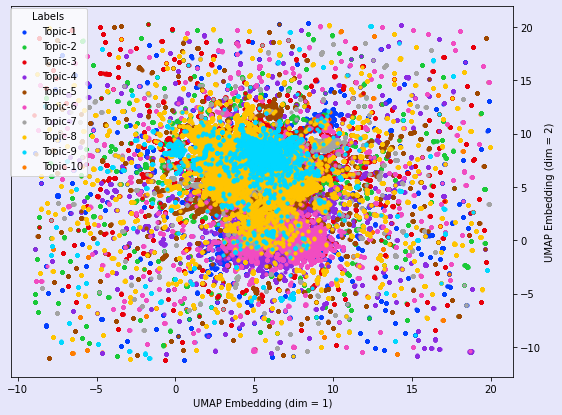

In [ ]:
plot2d_df(result = result,img_name = 'umap plot_secondwave.png')

##Words from each topic

In [ ]:
def get_words(model_secondwave, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_secondwave.get_num_topics() > num_topics:
      reduced_topic_lists = model_secondwave.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_secondwave.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [ ]:
words_second, _, _= get_words(model_second_reduced, 20, model_second_reduced.get_num_topics())
words_second

array([['vaccineshortage', 'vaccineforall', 'vaccineswork', 'vaccines',
        'vaccinezehad', 'vaccinemaitri', 'vaccinefor', 'vaccinating',
        'vaccinations', 'vaccine', 'vaccination', 'vaccinate',
        'vaccinated', 'vaccinat', 'vaccin', 'vaccinequity', 'vacci',
        'vaccinateindia', 'unvaccinated', 'getvaccinated'],
       ['covidisnotover', 'kejriwal', 'murshidabad', 'covidindia',
        'allegedly', 'breakingnews', 'ripmilkhasingh', 'covidsecondwave',
        'covidvaccine', 'shameonmpgovt', 'chiyaanvikram', 'covid',
        'kharcha', 'kabir', 'suffered', 'closely', 'lakh', 'seized',
        'whereas', 'arrestramdev'],
       ['indiahelp', 'indian', 'india', 'indianarmy', 'hindu', 'indians',
        'hindutva', 'hindustan', 'bharat', 'covidindia', 'kejriwal',
        'vaccinateindia', 'hindus', 'hindi', 'diwali', 'newindia',
        'healthyindia', 'nehru', 'crore', 'pakistan'],
       ['vaccineshortage', 'vaccineforall', 'vaccinemaitri',
        'vaccinating', 'vac

In [ ]:
words, _, _= get_words(model_secondwave, 20, model_secondwave.get_num_topics())
words_second, _, _ = get_words(model_secondwave, 20, model_secondwave.get_num_topics(reduced = 'True'))
words_second

ValueError: ignored

In [ ]:
words

array([['vaccineshortage', 'vaccineforall', 'vaccineswork', 'vaccines',
        'vaccinezehad', 'vaccinemaitri', 'vaccinefor', 'vaccinating',
        'vaccinations', 'vaccine', 'vaccination', 'vaccinate',
        'vaccinated', 'vaccinat', 'vaccin', 'vaccinequity', 'vacci',
        'vaccinateindia', 'unvaccinated', 'getvaccinated'],
       ['covidisnotover', 'kejriwal', 'murshidabad', 'covidindia',
        'allegedly', 'breakingnews', 'ripmilkhasingh', 'covidsecondwave',
        'covidvaccine', 'shameonmpgovt', 'chiyaanvikram', 'covid',
        'kharcha', 'kabir', 'suffered', 'closely', 'lakh', 'seized',
        'whereas', 'arrestramdev'],
       ['indiahelp', 'indian', 'india', 'indianarmy', 'hindu', 'indians',
        'hindutva', 'hindustan', 'bharat', 'covidindia', 'kejriwal',
        'vaccinateindia', 'hindus', 'hindi', 'diwali', 'newindia',
        'healthyindia', 'nehru', 'crore', 'pakistan'],
       ['vaccineshortage', 'vaccineforall', 'vaccinemaitri',
        'vaccinating', 'vac

In [ ]:
words[0]

array(['vaccineshortage', 'vaccineforall', 'vaccineswork', 'vaccines',
       'vaccinezehad', 'vaccinemaitri', 'vaccinefor', 'vaccinating',
       'vaccinations', 'vaccine', 'vaccination', 'vaccinate',
       'vaccinated', 'vaccinat', 'vaccin', 'vaccinequity', 'vacci',
       'vaccinateindia', 'unvaccinated', 'getvaccinated'], dtype='<U15')

In [ ]:
words[1]

array(['covidisnotover', 'kejriwal', 'murshidabad', 'covidindia',
       'allegedly', 'breakingnews', 'ripmilkhasingh', 'covidsecondwave',
       'covidvaccine', 'shameonmpgovt', 'chiyaanvikram', 'covid',
       'kharcha', 'kabir', 'suffered', 'closely', 'lakh', 'seized',
       'whereas', 'arrestramdev'], dtype='<U15')

In [ ]:
words[2]

array(['indiahelp', 'indian', 'india', 'indianarmy', 'hindu', 'indians',
       'hindutva', 'hindustan', 'bharat', 'covidindia', 'kejriwal',
       'vaccinateindia', 'hindus', 'hindi', 'diwali', 'newindia',
       'healthyindia', 'nehru', 'crore', 'pakistan'], dtype='<U15')

In [ ]:
words[3]

array(['vaccineshortage', 'vaccineforall', 'vaccinemaitri', 'vaccinating',
       'vaccinefor', 'vaccinezehad', 'vaccinated', 'vaccineswork',
       'vaccines', 'vaccination', 'vaccine', 'vaccinate', 'vaccinat',
       'vaccin', 'vaccinations', 'vaccinequity', 'vaccinateindia',
       'vacci', 'unvaccinated', 'getvaccinated'], dtype='<U15')

In [ ]:
words[4]

array(['hospitals', 'medical', 'hospital', 'hospitalised', 'hospitalized',
       'healthcare', 'hospitalization', 'hospitalisation', 'ambulance',
       'patients', 'ambulances', 'nurse', 'doctors', 'medicine',
       'healthyindia', 'nurses', 'clinical', 'medicos', 'dr', 'doctor'],
      dtype='<U15')

In [ ]:
words[5]

array(['vaccinateindia', 'vaccineshortage', 'vaccineforall', 'vaccines',
       'vaccinezehad', 'vaccinations', 'vaccinating', 'vaccination',
       'vaccinefor', 'vaccine', 'vaccineswork', 'vaccinate', 'vaccinated',
       'vaccin', 'vaccinemaitri', 'vaccinat', 'vacci', 'vaccinequity',
       'unvaccinated', 'getvaccinated'], dtype='<U15')

In [ ]:
words[6]

array(['shameonmpgovt', 'ripmilkhasingh', 'thanking', 'jharkhand',
       'kejriwal', 'blessed', 'kharcha', 'jammuandkashmir', 'grateful',
       'diwali', 'bhadrak', 'saintramrahimji', 'radheshyam', 'appreciate',
       'blessing', 'murshidabad', 'ganesh', 'lakh', 'gandhi',
       'akshaykumar'], dtype='<U15')

In [ ]:
words[7]

array(['cancelboardexam', 'exams', 'sadly', 'examdate', 'exam', 'failed',
       'unfortunately', 'failing', 'caexams', 'suffered', 'helpless',
       'volunteers', 'unemployment', 'boardexams', 'didnt', 'volunteer',
       'unemployed', 'students', 'delayed', 'sorry'], dtype='<U15')

In [ ]:
words[8]

array(['governments', 'government', 'govt', 'govts', 'gov', 'governance',
       'corruption', 'bureaucrats', 'parliament', 'politicians',
       'parliamentary', 'repeal', 'farmersprotest', 'corrupt',
       'federalism', 'politician', 'thepolitics', 'governor',
       'administration', 'democracy'], dtype='<U15')

In [ ]:
words[9]

array(['pandemic', 'pandemics', 'catastrophic', 'crisis', 'disaster',
       'catastrophe', 'epidemic', 'disasters', 'crises', 'recession',
       'dengue', 'worrisome', 'panic', 'rising', 'disastrous', 'outbreak',
       'collapse', 'suffered', 'outbreaks', 'collapsed'], dtype='<U15')

##Third wave

In [ ]:
import pandas as pd
third_wave = pd.read_csv("/content/drive/MyDrive/third_wave_preprocessed.csv", lineterminator='\n')

In [ ]:
third_wave

,Unnamed: 0,tweet
0,0,covaxin is the superstar lancet study found ...
1,1,dr ella who has received dozens of previo...
2,2,does this post pandemic world will affect pr...
3,3,myyth buster is here for covid 19 vaccine ra...
4,4,90 of australians aged 16 and over had their ...
...,...,...
1122578,1122578,it is highly communal to blame xmas for 3200 ...
1122579,1122579,in the past 2 days bmc has changed the report...
1122580,1122580,i just hope covid takes care of highly toxic...
1122581,1122581,boycottcsvtuofflineexam boycottcsvtuofflin...


In [ ]:
third_wave = third_wave.rename(columns={'tweet\r': 'tweet'})

In [ ]:
third_wave

,Unnamed: 0,tweet
0,0,covaxin is the superstar lancet study found ...
1,1,dr ella who has received dozens of previo...
2,2,does this post pandemic world will affect pr...
3,3,myyth buster is here for covid 19 vaccine ra...
4,4,90 of australians aged 16 and over had their ...
...,...,...
1122578,1122578,it is highly communal to blame xmas for 3200 ...
1122579,1122579,in the past 2 days bmc has changed the report...
1122580,1122580,i just hope covid takes care of highly toxic...
1122581,1122581,boycottcsvtuofflineexam boycottcsvtuofflin...


In [ ]:
subset_thirdwave = third_wave.sample(n=172583)

In [ ]:
subset_thirdwave.to_csv('third.csv')

In [ ]:
df_thirdwave = subset_thirdwave.dropna()

In [ ]:
df_thirdwave

,Unnamed: 0,tweet
529511,529511,useful thread on how accountability and tran...
298545,298545,yogi ji has ensured that up is equipped to fig...
442526,442526,95 of india s adult population given first do...
902020,902020,pm s photo shouldn t be there on vaccine ce...
456366,456366,blockbuster hridayam maintaining a very very ...
...,...,...
853149,853149,proper arrangements have been made at hydairp...
162506,162506,pushpa is the biggest blockbuster in nepal si...
936451,936451,i m not a covid alarmist but with the rate...
1048250,1048250,maharashtra ncp mp supriya sule and her hus...


In [ ]:
subset_thirdwave['no. of words'] = subset_thirdwave['tweet'].str.split().str.len()
subset_thirdwave['no. of words'].sum()

4580101.0

In [ ]:
df_thirdwave = df_thirdwave.tweet.astype(str).to_list()

In [ ]:
len(df_thirdwave)

172567

In [ ]:
df_thirdwave[:2]

['useful thread on how  accountability and  transparency  amp   participation took a hit during the pandemic    assessment from 120 countries was  info on covid19 expenditure was limited in most countries  nearly half bypassed legislative process and citizen participation was rare   ',
 'yogi ji has ensured that up is equipped to fight against emergencies like covid  hospitals  oxygen plants  vaccination  testing   everywhere up has witnessed tremendous development since last many years under yogi ji                  ']

In [ ]:
df_thirdwave

[' corona crisis   bjp propaganda vs reality  congressbharat  ',
 'lausd poised to push back deadline for student covid  ',
 '      jai    1  ram mandir  2 dhara 370 3  toilet  4  better road  5  better light  6  buldozer 7  encounter 8  bank account for poor person  9  kisan saman nidhi  10 corona kaal mai arthik madad food 11  without bribe government job  12  no casteism in government schemes etc',
 'biological e limited s corbevax vaccine  india s first indigenously developed receptor binding domain  rbd  protein sub unit vaccine against  covid 19  has received emergency use authorisation  eua  from india s drug regulator for the 12 to 18 year age group  biological e limited  ',
 ' wearing a mask can considerably reduce the risk of virus transmission  don t forget to dispose of or wash after use  amp  was ',
 'covid 19 pandemic pushed over half a billion into extreme poverty  un report   india news   times of india  ',
 'washington  omicron can evade the immune protection conferred

In [ ]:
umap_args = {'n_neighbors': 10,
             'n_components': 5,
             'metric': 'cosine',
             "random_state": 42
             }
hdbscan_args = {'min_cluster_size': 10,
                'min_samples':5,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'
             }
model_thirdwave = TopicModel(documents= df_thirdwave,speed='learn',workers = '8', embedding_model='distiluse-base-multilingual-cased', umap_args = umap_args, hdbscan_args = hdbscan_args)
model_thirdwave.get_num_topics()

2022-08-14 11:10:10,047 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-08-14 11:10:23,800 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2022-08-14 11:10:24,993 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-08-14 11:12:36,814 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
f

4605

In [ ]:
from topic_model import TopicModel

In [ ]:
model_thirdwave = TopicModel.load("/content/drive/MyDrive/modeling covid/thirdwave_new")

In [ ]:
model_thirdwave.topic_words

array([['vaccinemandate', 'vaccines', 'vaccinations', ..., 'effective',
        'hindu', 'quarantines'],
       ['immunogenic', 'immunized', 'immunization', ..., 'positiv',
        'infects', 'vacci'],
       ['retweet', 'tweet', 'tweeted', ..., 'backlogdeaths', 'defense',
        'threats'],
       ...,
       ['symptoms', 'vaccinesuccess', 'vaccinemandate', ..., 'immunity',
        'yesterday', 'infects'],
       ['fullyvaccinated', 'total', 'innumerable', ..., 'throughout',
        'wuhanvirus', 'today'],
       ['welfareworks', 'better', 'welfare', ..., 'additional', 'easier',
        'healthier']], dtype='<U15')

In [ ]:
model_thirdwave.search_documents_by_keywords(keywords=['well'], num_docs=30)

(array(['well     ', 'well    ', 'well     ', 'well     ', 'good    ',
        'good    ', 'good  ', 'good   ', 'good  ', 'good    ', 'good    ',
        '  okay      ', '   okay    ', '   okay    ', '   okay    ',
        'okay   ', 'okay    ', 'okay  ', 'okay       ', '   okay    ',
        'okay    ', 'welldone  ', 'good  it s unconstitutional   ',
        'so good    ', 'so good    ', 'good thing    ', ' nice', 'nice  ',
        'nice  ', 'nice   '], dtype=object),
 array([0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.94048222,
        0.94048222, 0.94048222, 0.94048222, 0.94048222, 0.94048222,
        0.94048222, 0.90218222, 0.90218222, 0.90218222, 0.90218222,
        0.90218222, 0.90218222, 0.90218222, 0.90218222, 0.90218222,
        0.90218222, 0.89862531, 0.89000529, 0.8813923 , 0.8813923 ,
        0.86516123, 0.86145706, 0.86145706, 0.86145706, 0.86145706]),
 array([413282, 360902, 358604, 291902, 413301,  84059, 192708, 185804,
        145461, 248297, 167519, 280678, 1455

In [ ]:
model_thirdwave.get_topic_sizes()

(array([1942, 1442, 1394, ...,    1,    1,    1]),
 array([    0,     1,     2, ..., 10814, 10815, 10816]))

In [ ]:
topic_sizes, topic_nums = model_thirdwave.get_topic_sizes()

In [ ]:
topic_words, word_scores, topic_nums = model_thirdwave.get_topics(20)

In [ ]:
model_thirdwave.save("/content/drive/MyDrive/modeling covid/thirdwave_new")

In [ ]:
model_thirdwave

##Visualisations third wave

In [ ]:
def get_embeddings_df_2d(model_thirdwave, num_reduced_topics = 10, sigma = None, random_state = 42 ):
    """
    2d plot the documents embedding
    """
    umap_args = {
      "n_neighbors": 15,
      "n_components": 2, # 5 -> 2 for plotting
      "metric": "cosine",
      "random_state":random_state
      }
    if not sigma:
    	sigma = [3,3] #default value
    umap_data = umap.UMAP(**umap_args).fit_transform(model_thirdwave._get_document_vectors(norm=False))

    #get dataframe of the result
    result_thirdwave = pd.DataFrame(umap_data, columns=['x_embeddings', 'y_embeddings'])
    result_thirdwave['Labels'] = np.array( ['Topic-'+ str(x+1) if x != -1 else 'outliers' for x in list(model_thirdwave.doc_top) ] )

    #### Hierarchical Topic Reduction ##########################
    new_label = []
    if model_thirdwave.get_num_topics() > num_reduced_topics:
      reduced_topic_lists = model_thirdwave.hierarchical_topic_reduction(num_topics = num_reduced_topics)
      ######################################

      ###get new labels
      for top_doc in model_thirdwave.doc_top:
        for idx, reduced_list in enumerate(reduced_topic_lists):
          if top_doc in reduced_list:
            new_label.append("Topic-"+str(idx+1))
            break
      ##################################
      result_thirdwave["Labels"] = np.array(new_label)
    else:
      result_thirdwave["Labels"] = result_thirdwave['Labels']

    #remove outliers
    result_thirdwave = result_thirdwave[np.abs(result_thirdwave.x_embeddings-result_thirdwave.x_embeddings.mean()) <= (sigma[0]*result_thirdwave.x_embeddings.std())]
    result_thirdwave = result_thirdwave[np.abs(result_thirdwave.y_embeddings-result_thirdwave.y_embeddings.mean()) <= (sigma[1]*result_thirdwave.y_embeddings.std())]
    return result_thirdwave
result_thirdwave = get_embeddings_df_2d(model_thirdwave, sigma = [2.5, 2.5], num_reduced_topics = 10)

KeyboardInterrupt: ignored

In [ ]:
model_thirdwave.save("/content/drive/MyDrive/modeling covid/thirdwave_final_reduced")

In [ ]:
model_third_reduced = TopicModel.load("/content/drive/MyDrive/modeling covid/thirdwave_final_reduced")

In [ ]:
thirdwave_new_reduced

In [ ]:
result_thirdwave

In [ ]:
result_thirdwave['Labels']

In [ ]:
thirdwave_new_reduced.get_num_topics()

In [ ]:
def plot2d_df(result_thirdwave, palet = 'bright', img_name = 'thirdwave_umap.png'):

    clrs = sns.color_palette(palet).as_hex()
    # color_palette = [cpt for cpt in clrs]
    #palette = sns.color_palette(palet)
    x = result_thirdwave['x_embeddings']
    y = result_thirdwave['y_embeddings']
    # z = result['z_embeddings']
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    ax.set_xlabel('UMAP Embedding (dim = 1)')
    ax.set_ylabel('UMAP Embedding (dim = 2)')

    fig.patch.set_facecolor('lavender')
    ax.set_facecolor('lavender')

    result_thirdwave = result_thirdwave.sort_values(by=['Labels'])
    for idx, topics in enumerate(result_thirdwave.Labels.unique()):
        ax.scatter(x[result_thirdwave.Labels == topics],y[result_thirdwave.Labels == topics],label = topics, c = clrs[idx], s = 10)

    ax = plt.gca()

    #set y-axes to right side
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*natsorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc='center right', bbox_to_anchor=(0.16, 0.77), title="Labels")
    plt.tight_layout()
    plt.savefig(img_name, bbox_inches = 'tight',dpi = 250, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
plot2d_df(result_thirdwave = result_thirdwave,img_name = 'umap plot_thirdwave')

In [ ]:
def get_words(model_thirdwave, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_thirdwave.get_num_topics() > num_topics:
      reduced_topic_lists = model_thirdwave.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_thirdwave.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [ ]:
words_first, _, _ = get_words(model_first_reduced, 20, model_first_reduced.get_num_topics( ))
words_first

array([['mask', 'masks', 'faces', ..., 'safety', 'hiding', 'scare'],
       ['tr', 'sood', 'havoc', ..., 'se', 'kumar', 'apne'],
       ['doctors', 'doctor', 'doctorsday', ..., 'pharma', 'medicines',
        'ambulance'],
       ...,
       ['youth', 'young', 'coronavirus', ..., 'chances', 'disease',
        'vaccine'],
       ['india', 'indian', 'indians', ..., 'ahmedabad', 'crore',
        'universities'],
       ['rain', 'rains', 'sunglasses', ..., 'laughing', 'teacher',
        'courses']], dtype='<U15')

In [ ]:
words_third, _, _ = get_words(thirdwave_new_reduced, 20, thirdwave_new_reduced.get_num_topics( ))
words_third

array([['vaccinemandate', 'vaccines', 'vaccinating', 'vaccination',
        'vaccineswork', 'vaccine', 'vaccinate', 'vaccinated',
        'vaccinations', 'vaccinesuccess', 'vaccin', 'vaccinequity',
        'vaccinates', 'vacci', 'unvaccinated', 'getvaccinated',
        'fullyvaccinated', 'wuhanvirus', 'ebola', 'antiviral'],
       ['vaccinemandate', 'vaccinated', 'vaccineswork', 'vaccines',
        'vaccinating', 'vaccine', 'vaccinate', 'vaccinesuccess',
        'vaccin', 'vaccination', 'vaccinations', 'vaccinequity',
        'getvaccinated', 'fullyvaccinated', 'vacci', 'unvaccinated',
        'vaccinates', 'ebola', 'wuhanvirus', 'immunization'],
       ['indianews', 'indian', 'indiangovt', 'india', 'indianarmy',
        'indias', 'hindu', 'indianeconomy', 'indians', 'indiamap',
        'indianrailways', 'indiablooms', 'hindustani', 'hindutva',
        'hindustan', 'bharat', 'covidindia', 'bharati', 'kejriwal',
        'hindi'],
       ['covidisnotover', 'covidguideline', 'covidpandemi

In [ ]:
#final
words_third, _, _ = get_words(thirdwave_new_reduced, 20, thirdwave_new_reduced.get_num_topics( ))
words_third

array([['vaccinemandate', 'vaccines', 'vaccinating', 'vaccination',
        'vaccineswork', 'vaccine', 'vaccinate', 'vaccinated',
        'vaccinations', 'vaccinesuccess', 'vaccin', 'vaccinequity',
        'vaccinates', 'vacci', 'unvaccinated', 'getvaccinated',
        'fullyvaccinated', 'wuhanvirus', 'ebola', 'antiviral'],
       ['vaccinemandate', 'vaccinated', 'vaccineswork', 'vaccines',
        'vaccinating', 'vaccine', 'vaccinate', 'vaccinesuccess',
        'vaccin', 'vaccination', 'vaccinations', 'vaccinequity',
        'getvaccinated', 'fullyvaccinated', 'vacci', 'unvaccinated',
        'vaccinates', 'ebola', 'wuhanvirus', 'immunization'],
       ['indianews', 'indian', 'indiangovt', 'india', 'indianarmy',
        'indias', 'hindu', 'indianeconomy', 'indians', 'indiamap',
        'indianrailways', 'indiablooms', 'hindustani', 'hindutva',
        'hindustan', 'bharat', 'covidindia', 'bharati', 'kejriwal',
        'hindi'],
       ['covidisnotover', 'covidguideline', 'covidpandemi

In [ ]:
words, _, _= get_words(model_thirdwave, 20, model_thirdwave.get_num_topics())
words_third, _, _ = get_words(model_thirdwave, 20, model_thirdwave.get_num_topics(reduced = 'True'))
words_third

ValueError: ignored

In [ ]:
words_third

In [ ]:
model_thirdwave.topic_words[21]

In [ ]:
words_third[0]

array(['vaccinemandate', 'vaccines', 'vaccinating', 'vaccination',
       'vaccineswork', 'vaccine', 'vaccinate', 'vaccinated',
       'vaccinations', 'vaccinesuccess', 'vaccin', 'vaccinequity',
       'vaccinates', 'vacci', 'unvaccinated', 'getvaccinated',
       'fullyvaccinated', 'wuhanvirus', 'ebola', 'antiviral'],
      dtype='<U15')

In [ ]:
words_third[1]

array(['vaccinemandate', 'vaccinated', 'vaccineswork', 'vaccines',
       'vaccinating', 'vaccine', 'vaccinate', 'vaccinesuccess', 'vaccin',
       'vaccination', 'vaccinations', 'vaccinequity', 'getvaccinated',
       'fullyvaccinated', 'vacci', 'unvaccinated', 'vaccinates', 'ebola',
       'wuhanvirus', 'immunization'], dtype='<U15')

In [ ]:
words_third[2]

array(['indianews', 'indian', 'indiangovt', 'india', 'indianarmy',
       'indias', 'hindu', 'indianeconomy', 'indians', 'indiamap',
       'indianrailways', 'indiablooms', 'hindustani', 'hindutva',
       'hindustan', 'bharat', 'covidindia', 'bharati', 'kejriwal',
       'hindi'], dtype='<U15')

In [ ]:
words_third[3]

array(['covidisnotover', 'covidguideline', 'covidpandemic',
       'covidvaccine', 'coviddeaths', 'cooch', 'covidvaccines',
       'covidguidelines', 'covid', 'covidhero', 'comorbid', 'covidtest',
       'covovax', 'covaxin', 'wbpc', 'covax', 'kkundrrasquad', 'bymygov',
       'sdm', 'covidpositive'], dtype='<U15')

In [ ]:
words_third[4]

array(['migrantcrisis', 'unemployment', 'overcoming', 'delayed',
       'disrupted', 'prevented', 'crisis', 'overdue', 'recession',
       'migrants', 'boycottmodi', 'abruptly', 'slowly', 'farmersprotest',
       'badly', 'collapsed', 'preventing', 'prevent', 'overwhelmed',
       'sadly'], dtype='<U15')

In [ ]:
words_third[5]

array(['parliament', 'parliamentary', 'governmental', 'governments',
       'government', 'politicians', 'corruption', 'govt', 'misgovernance',
       'governance', 'undemocratic', 'politician', 'govts', 'democracy',
       'democratic', 'democrats', 'elected', 'gov', 'bureaucrats',
       'corrupt'], dtype='<U15')

In [ ]:
words_third[6]

array(['newsupdate', 'latestnews', 'newstoday', 'newsupdates',
       'updatenews', 'middaynews', 'dailynews', 'breakingnews', 'news',
       'indianews', 'noticias', 'deaths', 'cases', 'newsoftheday',
       'recently', 'worldcancerday', 'recent', 'ommcomnews', 'fatalities',
       'coronaviruses'], dtype='<U15')

In [ ]:
words_third[7]

array(['studentprotest', 'onlineexams', 'students', 'exams',
       'aktuonlineexams', 'cancelexams', 'exam', 'student', 'colleges',
       'examinations', 'campus', 'studying', 'cancelboardexam',
       'classroom', 'universities', 'campuses', 'graduates', 'semester',
       'university', 'classrooms'], dtype='<U15')

In [ ]:
words_third[8]

array(['gratitude', 'blessed', 'thanking', 'grateful', 'blessing',
       'appreciate', 'goodlucksakhi', 'bless', 'thankful', 'appreciated',
       'wellbeing', 'condolences', 'thanked', 'prayer', 'fortunately',
       'thankfully', 'blessings', 'appreciating', 'recover', 'prayed'],
      dtype='<U15')

In [ ]:
words_third[9]

array(['kejriwal', 'kharagpur', 'chhatarpur', 'dharamshala', 'bharat',
       'bharati', 'imrankhan', 'iitkharagpur', 'pminrajyasabha',
       'releasebapuji', 'gandhinagar', 'jharkhand', 'diwali',
       'chalojaipur', 'sarbatdabhala', 'bhadrak', 'hindu', 'cricket',
       'thekashmirfiles', 'khanna'], dtype='<U15')

In [ ]:
model_first_reduced =  model_first.hierarchical_topic_reduction(num_topics = 10)

In [ ]:
model_first_reduced.save("/content/drive/MyDrive/modeling covid/model_first_reduced")

In [ ]:
model_secondwave=model_second_reduced

In [ ]:
model_thirdwave= thirdwave_new_reduced

In [ ]:
model_first_reduced.get_num_topics(reduced="True")

10

In [ ]:
model_third_reduced

In [ ]:
model_second_reduced = model_secondwave.hierarchical_topic_reduction(num_topics = 10)

In [ ]:
model_third_reduced = model_thirdwave.hierarchical_topic_reduction(num_topics = 10)

KeyboardInterrupt: ignored

In [ ]:
model_first_reduced

In [ ]:
model_second_reduced

In [ ]:
model_third_reduced

In [ ]:
model_third_reduced.topic_vectors

array([[ 0.03579339,  0.06767768, -0.03193099, ..., -0.05202463,
        -0.055314  , -0.03512782],
       [-0.0522377 ,  0.03698419,  0.0044091 , ..., -0.07448147,
        -0.05999272,  0.01488009],
       [-0.03160883, -0.05471859,  0.03224123, ..., -0.03243551,
        -0.0268295 , -0.03161139],
       ...,
       [ 0.005428  ,  0.05785936, -0.04165019, ..., -0.03360027,
        -0.01413821,  0.019487  ],
       [ 0.03574186,  0.01767414, -0.05744768, ...,  0.0028679 ,
        -0.03538214, -0.04014289],
       [ 0.04444597,  0.00763095, -0.00615119, ..., -0.04159379,
        -0.06944228,  0.06025583]], dtype=float32)

In [ ]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [ ]:
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_secondwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

In [ ]:
def bipartite_to_adjacency(A):
     m, n = A.shape
     Z_mm = np.zeros((m,m), dtype=int)
     Z_nn = np.zeros((n,n), dtype=int)
     top_partition = np.concatenate((Z_nn,np.transpose(A)), axis=1)
     bottom_partition = np.concatenate((A,Z_mm), axis=1)
     return np.concatenate((top_partition, bottom_partition))
sim_G = nx.to_networkx_graph(bipartite_to_adjacency(similarity_matrix))

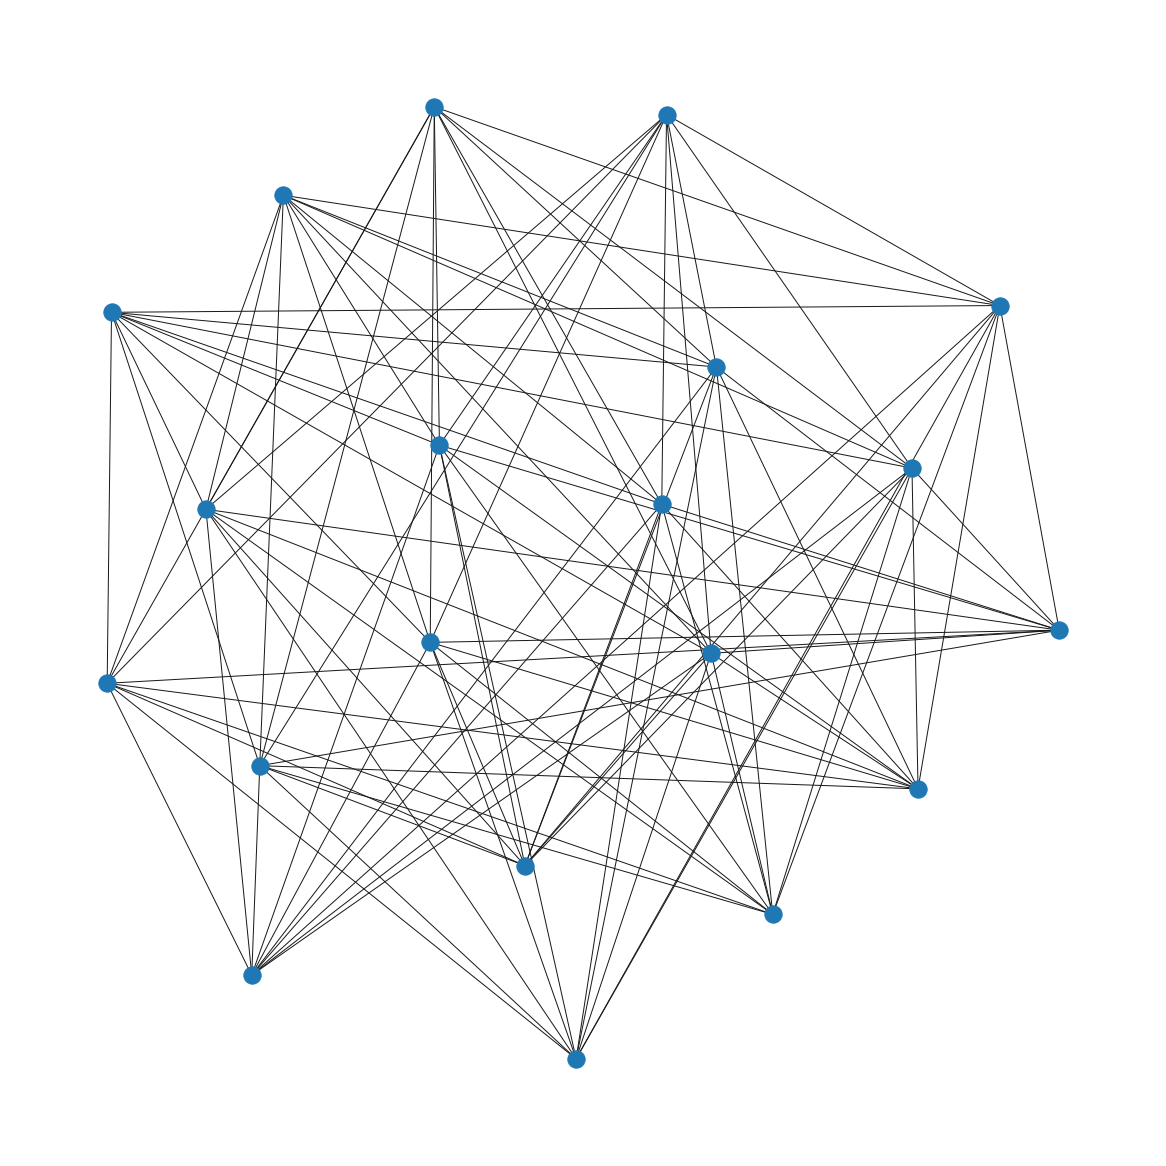

In [ ]:
plt.figure(figsize=(16,16))
nx.draw(sim_G)

In [ ]:
print(sim_G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
most_similar

array([9, 1, 1, 1, 3, 2, 6, 8, 4, 1])

In [ ]:
ms_value = similarity_matrix.max(axis=1)
ms_value

array([0.7849875 , 0.91675067, 0.7547538 , 0.6799753 , 0.91693556,
       0.95600295, 0.8752334 , 0.90531087, 0.90330267, 0.35920995],
      dtype=float32)

In [ ]:
y_tick = ['Topic-{}'.format(x+1) for x in range(10)]
x_tick = ['Topic-{}'.format(x+1) for x in range(10)]

In [ ]:
sns.set(font_scale=2)

###Second VS Third Wave

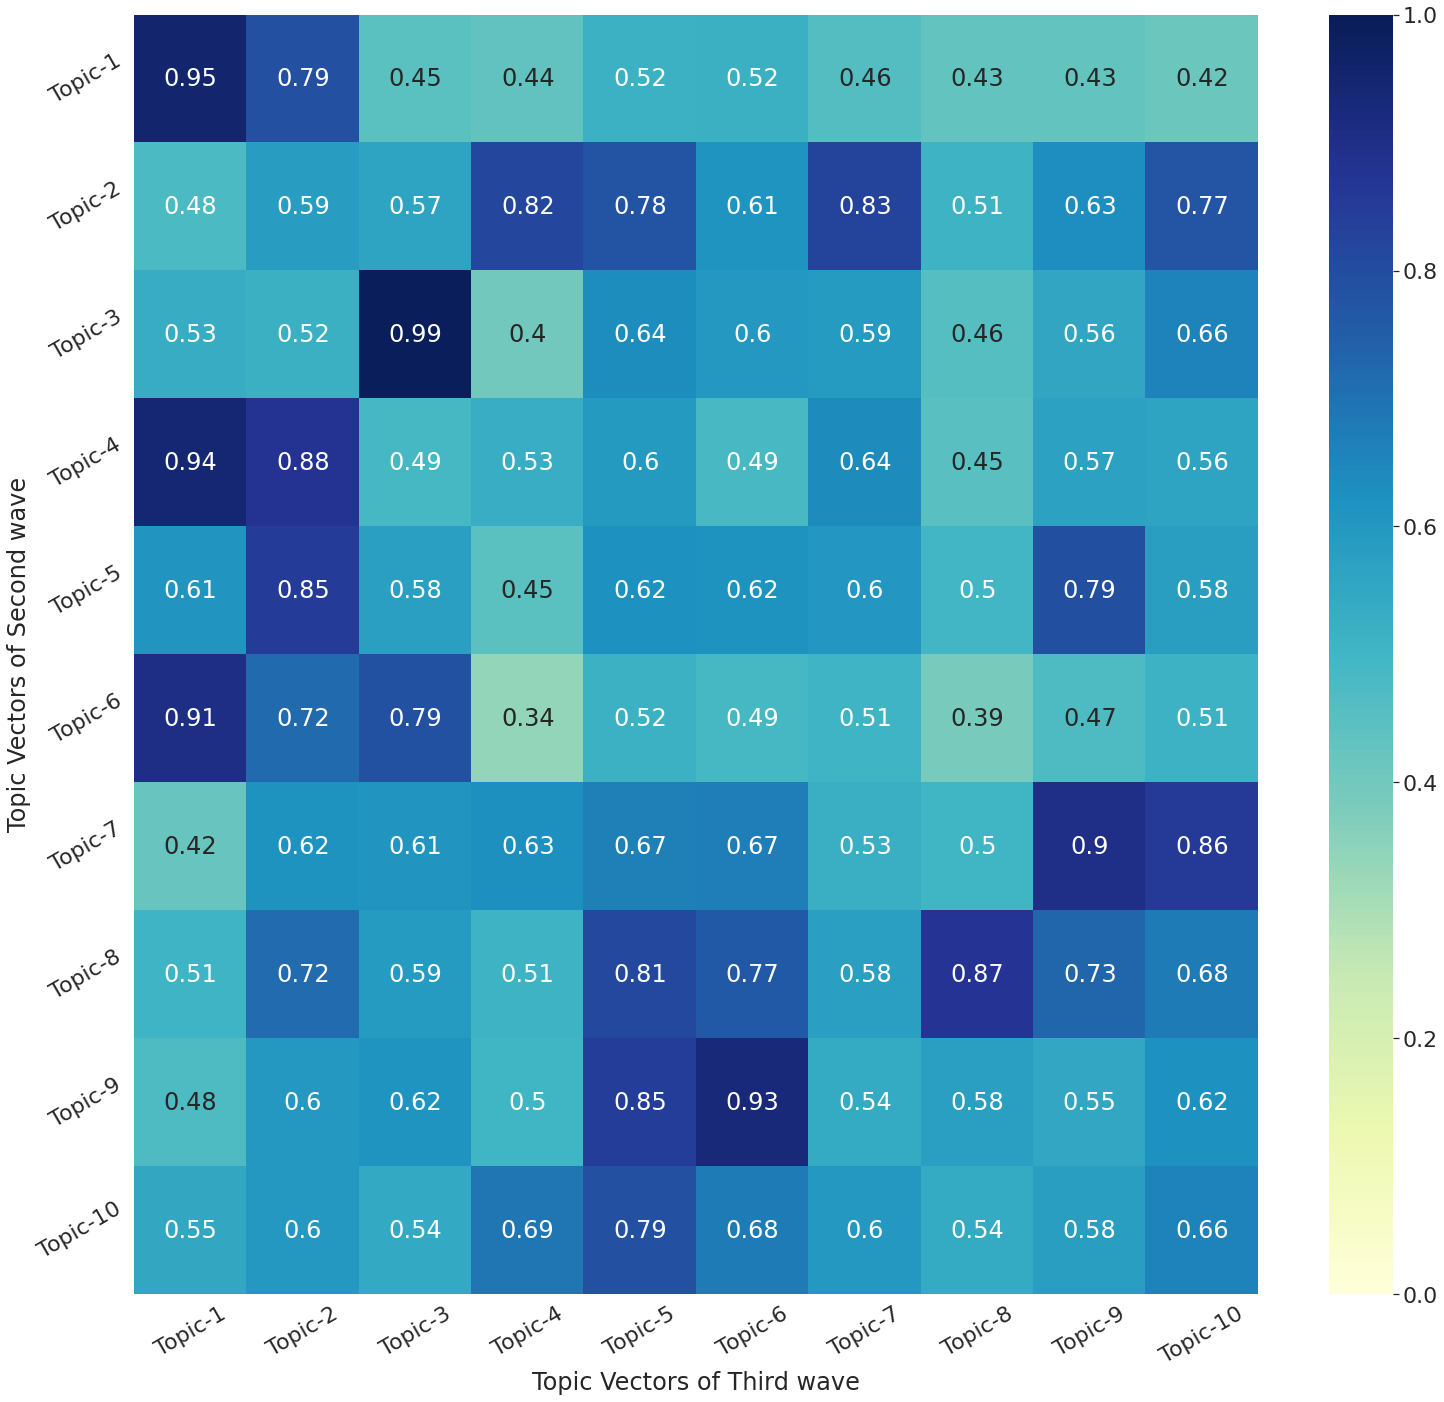

In [ ]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of Second wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = False
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [ ]:
words_secondwave, _, _= get_words(model_second_reduced, 10, model_second_reduced.get_num_topics())
words_thirdwave, _, _ = get_words(model_third_reduced, 10, model_third_reduced.get_num_topics())
words_secondwave

array([['vaccineshortage', 'vaccineforall', 'vaccineswork', 'vaccines',
        'vaccinezehad', 'vaccinemaitri', 'vaccinefor', 'vaccinating',
        'vaccinations', 'vaccine'],
       ['covidisnotover', 'kejriwal', 'murshidabad', 'covidindia',
        'allegedly', 'breakingnews', 'ripmilkhasingh', 'covidsecondwave',
        'covidvaccine', 'shameonmpgovt'],
       ['indiahelp', 'indian', 'india', 'indianarmy', 'hindu', 'indians',
        'hindutva', 'hindustan', 'bharat', 'covidindia'],
       ['vaccineshortage', 'vaccineforall', 'vaccinemaitri',
        'vaccinating', 'vaccinefor', 'vaccinezehad', 'vaccinated',
        'vaccineswork', 'vaccines', 'vaccination'],
       ['hospitals', 'medical', 'hospital', 'hospitalised',
        'hospitalized', 'healthcare', 'hospitalization',
        'hospitalisation', 'ambulance', 'patients'],
       ['vaccinateindia', 'vaccineshortage', 'vaccineforall', 'vaccines',
        'vaccinezehad', 'vaccinations', 'vaccinating', 'vaccination',
        'vacc

In [ ]:
words_thirdwave

array([['vaccinemandate', 'vaccines', 'vaccinating', 'vaccination',
        'vaccineswork', 'vaccine', 'vaccinate', 'vaccinated',
        'vaccinations', 'vaccinesuccess'],
       ['vaccinemandate', 'vaccinated', 'vaccineswork', 'vaccines',
        'vaccinating', 'vaccine', 'vaccinate', 'vaccinesuccess',
        'vaccin', 'vaccination'],
       ['indianews', 'indian', 'indiangovt', 'india', 'indianarmy',
        'indias', 'hindu', 'indianeconomy', 'indians', 'indiamap'],
       ['covidisnotover', 'covidguideline', 'covidpandemic',
        'covidvaccine', 'coviddeaths', 'cooch', 'covidvaccines',
        'covidguidelines', 'covid', 'covidhero'],
       ['migrantcrisis', 'unemployment', 'overcoming', 'delayed',
        'disrupted', 'prevented', 'crisis', 'overdue', 'recession',
        'migrants'],
       ['parliament', 'parliamentary', 'governmental', 'governments',
        'government', 'politicians', 'corruption', 'govt',
        'misgovernance', 'governance'],
       ['newsupdate', 'l

In [ ]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [ ]:
df3 = pd.DataFrame({"Topics of Second Wave":[','.join(list(x)) for x in words_second], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df3

,Topics of Second Wave,Most Similar topics in Third Wave,Similarity Score
0,"vaccineshortage,vaccineforall,vaccineswork,vac...","vaccinemandate,vaccines,vaccinating,vaccinatio...",0.954999
1,"covidisnotover,kejriwal,murshidabad,covidindia...","newsupdate,latestnews,newstoday,newsupdates,up...",0.827411
2,"indiahelp,indian,india,indianarmy,hindu,indian...","indianews,indian,indiangovt,india,indianarmy,i...",0.990204
3,"vaccineshortage,vaccineforall,vaccinemaitri,va...","vaccinemandate,vaccines,vaccinating,vaccinatio...",0.944258
4,"hospitals,medical,hospital,hospitalised,hospit...","vaccinemandate,vaccinated,vaccineswork,vaccine...",0.850770
5,"vaccinateindia,vaccineshortage,vaccineforall,v...","vaccinemandate,vaccines,vaccinating,vaccinatio...",0.906115
6,"shameonmpgovt,ripmilkhasingh,thanking,jharkhan...","gratitude,blessed,thanking,grateful,blessing,a...",0.901565
7,"cancelboardexam,exams,sadly,examdate,exam,fail...","studentprotest,onlineexams,students,exams,aktu...",0.872577
8,"governments,government,govt,govts,gov,governan...","parliament,parliamentary,governmental,governme...",0.932408
9,"pandemic,pandemics,catastrophic,crisis,disaste...","migrantcrisis,unemployment,overcoming,delayed,...",0.791983


In [ ]:
df3.to_csv('df3.csv')

###First VS Third wave

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

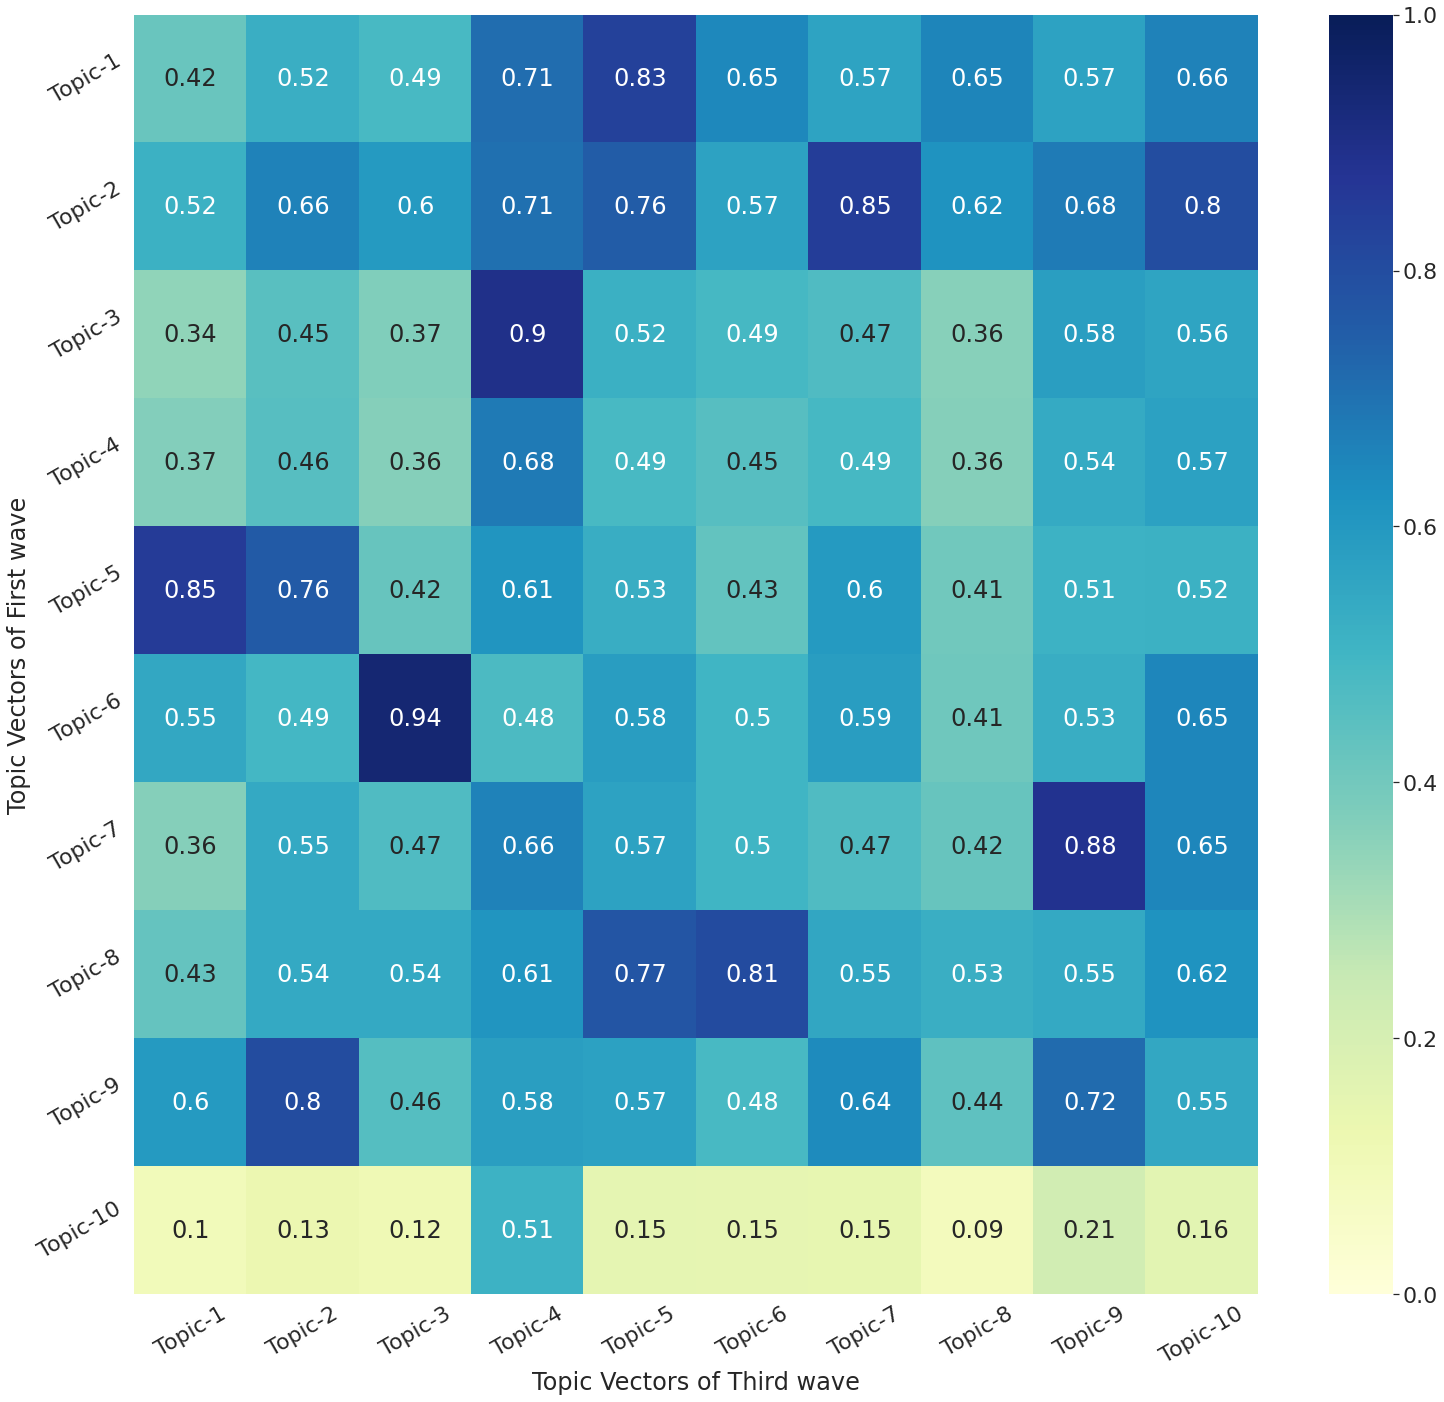

In [ ]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [ ]:
df2 = pd.DataFrame({"Topics of First Wave":[','.join(list(x)) for x in words_first], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df2.to_csv('df2.csv')
df2

,Topics of First Wave,Most Similar topics in Third Wave,Similarity Score
0,"lockdown,locked,lockdowns,lockdownindia,lockdo...","migrantcrisis,unemployment,overcoming,delayed,...",0.833690
1,"kejriwal,amitabhbachchan,suspected,lakh,tested...","newsupdate,latestnews,newstoday,newsupdates,up...",0.845591
2,"rather,hence,pathetic,thane,facepalming,toh,am...","covidisnotover,covidguideline,covidpandemic,co...",0.895440
3,"coronaupdate,coronaupdates,corona,coronawarrio...","covidisnotover,covidguideline,covidpandemic,co...",0.681575
4,"coronavirus,chinesevirus,chinavirus,uhanvirus,...","vaccinemandate,vaccines,vaccinating,vaccinatio...",0.852123
5,"indian,india,hindu,indians,hindustan,bharat,ke...","indianews,indian,indiangovt,india,indianarmy,i...",0.944972
6,"appreciate,gratitude,blessed,grateful,apprecia...","gratitude,blessed,thanking,grateful,blessing,a...",0.883465
7,"governments,government,govt,govts,gov,governan...","parliament,parliamentary,governmental,governme...",0.806674
8,"hospitals,hospital,medical,patients,healthcare...","vaccinemandate,vaccinated,vaccineswork,vaccine...",0.801291
9,"havoc,sood,coz,hrs,tht,apne,kumar,zany,amit,bl...","covidisnotover,covidguideline,covidpandemic,co...",0.514758


###First Second wave

In [ ]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_secondwave.shape)

(10, 512) (10, 512)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_secondwave)
most_similar = similarity_matrix.argmax(axis=1)

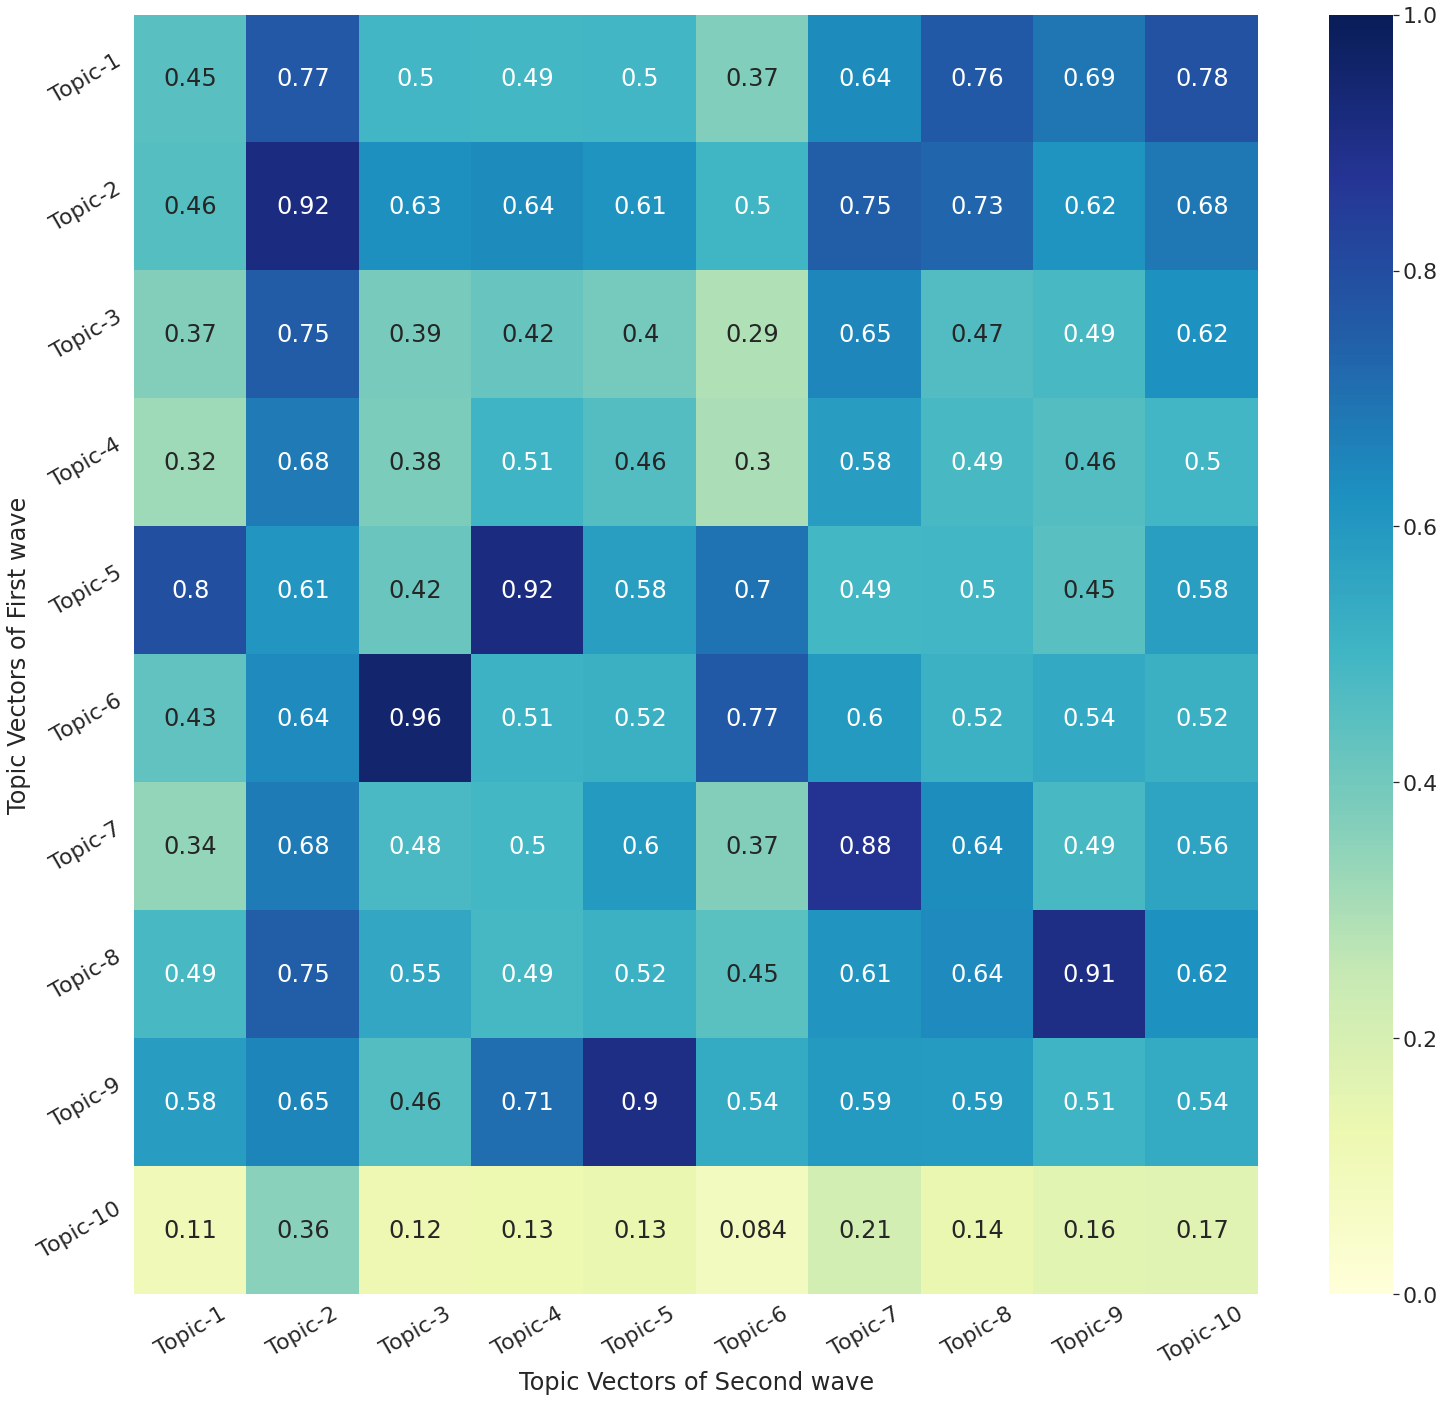

In [ ]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Second wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
mstg = []
for x in most_similar:
  mstg.append(words_second[x])
len(mstg)

10

In [ ]:
df1 = pd.DataFrame({"Topics of First Wave(top 10 words)":[','.join(list(x)) for x in words_first], "Most Similar topics in Second Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df1.to_csv('df1.csv')

In [ ]:
df1

,Topics of First Wave(top 10 words),Most Similar topics in Second Wave,Similarity Score
0,"lockdown,locked,lockdowns,lockdownindia,lockdo...","pandemic,pandemics,catastrophic,crisis,disaste...",0.784988
1,"kejriwal,amitabhbachchan,suspected,lakh,tested...","covidisnotover,kejriwal,murshidabad,covidindia...",0.916751
2,"rather,hence,pathetic,thane,facepalming,toh,am...","covidisnotover,kejriwal,murshidabad,covidindia...",0.754754
3,"coronaupdate,coronaupdates,corona,coronawarrio...","covidisnotover,kejriwal,murshidabad,covidindia...",0.679975
4,"coronavirus,chinesevirus,chinavirus,uhanvirus,...","vaccineshortage,vaccineforall,vaccinemaitri,va...",0.916936
5,"indian,india,hindu,indians,hindustan,bharat,ke...","indiahelp,indian,india,indianarmy,hindu,indian...",0.956003
6,"appreciate,gratitude,blessed,grateful,apprecia...","shameonmpgovt,ripmilkhasingh,thanking,jharkhan...",0.875233
7,"governments,government,govt,govts,gov,governan...","governments,government,govt,govts,gov,governan...",0.905311
8,"hospitals,hospital,medical,patients,healthcare...","hospitals,medical,hospital,hospitalised,hospit...",0.903303
9,"havoc,sood,coz,hrs,tht,apne,kumar,zany,amit,bl...","covidisnotover,kejriwal,murshidabad,covidindia...",0.359210


##Umap representation of all three waves

##Coherence score

In [ ]:
get_coherence(model_thirdwave, token_lists_u, corpus_u, dictionary_u)

KeyError: ignored

##K Means Clustering Algorithm and comparison

In [ ]:
combined_docs = df1 + df_thirdwave
print(len(combined_docs), len(df1), len(df_thirdwave))

16605 9476 7129


In [ ]:
kmeans_args = {"n_clusters": 15,
               "init": "k-means++"
               }
pca_args={"n_components": "mle",
          "svd_solver": "full"}
model_km_thirdwave = TopicModel(documents = combined_docs, speed='deep-learn', workers=8, min_count = 0, embedding_model='distiluse-base-multilingual-cased', pca_args = pca_args, kmeans_args = kmeans_args)

2022-08-05 01:42:22,149 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-08-05 01:42:24,785 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2022-08-05 01:42:26,769 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-08-05 01:42:53,311 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-08-05 01:47:55,745 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-08-05 01:48:

In [ ]:
print(model_km_thirdwave.get_num_topics())

15


##PCA vs UMAP

##PCA Embeddings

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def get_embeddings_df_2d_pca(model, num_reduced_topics = 10, sigma = None, random_state = 42 ):
    """
    2d plot the documents embedding
    """
    pca_args={"n_components": 2,
          "svd_solver": "auto"}
    if not sigma:
    	sigma = [3,3] #default value
    umap_data = PCA(**pca_args).fit_transform(model._get_document_vectors(norm=False))

    #get dataframe of the result
    result = pd.DataFrame(umap_data, columns=['x_embeddings', 'y_embeddings'])
    result['Labels'] = np.array( ['Topic-'+ str(x+1) if x != -1 else 'outliers' for x in list(model.doc_top) ] )

    #### Hierarchical Topic Reduction ##########################
    new_label = []
    if model.get_num_topics() > num_reduced_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_reduced_topics)
      ######################################

      ###get new labels
      for top_doc in model.doc_top:
        for idx, reduced_list in enumerate(reduced_topic_lists):
          if top_doc in reduced_list:
            new_label.append("Topic-"+str(idx+1))
            break
      ##################################
      result["Labels"] = np.array(new_label)
    else:
      result["Labels"] = result['Labels']

    #remove outliers
    result = result[np.abs(result.x_embeddings-result.x_embeddings.mean()) <= (sigma[0]*result.x_embeddings.std())]
    result = result[np.abs(result.y_embeddings-result.y_embeddings.mean()) <= (sigma[1]*result.y_embeddings.std())]
    return result
# result = get_embeddings_df_2d(model_gita_use_km, sigma = [2.5, 2.5], num_reduced_topics = 10)
def plot2d_df_pca(result, palet = 'bright', img_name = 'no_name_2d_plot.pdf'):

    clrs = sns.color_palette(palet).as_hex()
    # color_palette = [cpt for cpt in clrs]
    #palette = sns.color_palette(palet)
    x = result['x_embeddings']
    y = result['y_embeddings']
    # z = result['z_embeddings']
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    ax.set_xlabel('PCA Embedding (dim = 1)')
    ax.set_ylabel('PCA Embedding (dim = 2)')

    fig.patch.set_facecolor('lavender')
    ax.set_facecolor('lavender')

    result = result.sort_values(by=['Labels'])
    for idx, topics in enumerate(result.Labels.unique()):
        ax.scatter(x[result.Labels == topics],y[result.Labels == topics],label = topics, c = clrs[idx], s = 10)

    ax = plt.gca()

    #set y-axes to right side
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*natsorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc='center right', bbox_to_anchor=(0.16, 0.77), title="Labels")
    plt.tight_layout()
    plt.savefig(img_name, bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
def plot2d_text_pca(result, palet = 'bright', img_name = 'no_name_2d_plot.pdf'):

    clrs = sns.color_palette(palet).as_hex()
    # color_palette = [cpt for cpt in clrs]
    #palette = sns.color_palette(palet)
    x = result['x_embeddings']
    y = result['y_embeddings']
    # z = result['z_embeddings']
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    ax.set_xlabel('PCA Embedding (dim = 1)')
    ax.set_ylabel('PCA Embedding (dim = 2)')

    fig.patch.set_facecolor('lavender')
    ax.set_facecolor('lavender')

    result = result.sort_values(by=['docs'])
    for idx, topics in enumerate(result.docs.unique()):
        ax.scatter(x[result.docs == topics],y[result.docs == topics],label = topics, c = clrs[idx], s = 10)

    ax = plt.gca()

    #set y-axes to right side
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*natsorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc='center right', bbox_to_anchor=(0.28, 0.93), title="Tweets")
    plt.tight_layout()
    plt.savefig(img_name, bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
result_km = get_embeddings_df_2d_pca(model_km_thirdwave, sigma = [5, 5], num_reduced_topics = 10)

NameError: ignored

In [ ]:
result_km.shape

NameError: ignored

In [ ]:
a = ['Second Wave' for x in range(9476 )]
b = ['Third Wave' for x in range(7129)]
result_km['docs'] = a+ b
result_km.head()

,x_embeddings,y_embeddings,Labels,docs
0,0.025464,-0.255933,Topic-1,Second Wave
1,-0.108470,-0.179252,Topic-10,Second Wave
2,0.237512,0.109192,Topic-1,Second Wave
3,0.229958,0.026623,Topic-9,Second Wave
4,0.127515,0.150170,Topic-3,Second Wave


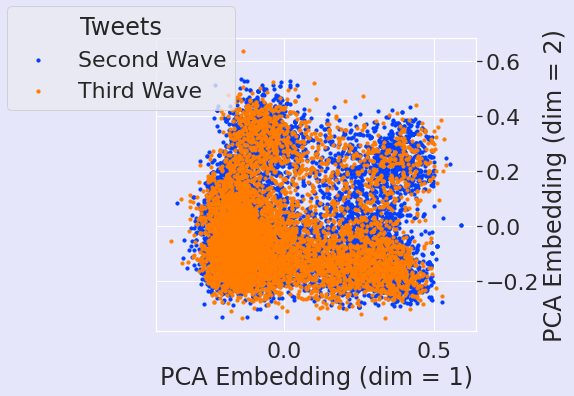

In [ ]:
plot2d_text_pca(result = result_km,img_name = 'PCA_embeddings_SecondThird Wave.pdf')

##Dendogram

In [ ]:
df_thirdwave

['authorities in beijing closed a mall and locked down several residential compounds after a spurt of covid cases were reported from chinese capital s central districts   \r',
 'we are fined for breathing oxygen and he is distributing his honourable saliva during the so called raging third wave   ab kare tou kya kare  boley tou kya boley   \r',
 'china s trade in 2021 was  6 trillion and us printed  5 8 trillion since pandemic out of thin air  now you know the difference between who creates wealth and who creates debt   china  usa\r',
 'cdc loosens covid 19 indoor mask guidance  including for schools  \r',
 ' 3 years of good governance in chhatisgarh and rajasthan     excellent work in education  healthcare and public welfare sc \r',
 'in lok sabha    said we could not get a foreign guest for republic day  those who live in india know we were in the midst of a corona wave    the 5 central asian presidents  who were to come  did hold a virtual summit on jan 27  did rahul gandhi miss tha

In [ ]:
import pandas as pd
df_third = pd.read_csv('third.csv')

In [ ]:
df_third = df_third.sample(n=53)


In [ ]:
df_third['tweet'].values

array(['jumlas  pr  amp  propaganda  3 words at the root of modi govt s vaccine drive    bjpfailsvaccination  ',
       'our msmes are the oldest and strongest pillars of the indian economy  during covid  we started the ecgls  this scheme has safeguarded nearly 1 5 crore jobs  and aided 6 crore lives      pm      aatmanirbhararthavyavastha  ',
       ' serious concern for  wfh employees       kindly push  workfromhome model atleast for next 6 months strict ',
       ' missed out on the print edition  don t worry  just head to the e paper to read today s  punetimes   click here for mor ',
       ' this is one pandemic that we are happy  amp  proud to say originated in india  it s the indian ceo  virus  no vaccine agains ',
       'comprehensive explanation on the new variant of sars cov2  omicron    ',
       'students rely on  gate2022 for jobs and higher studies  it is highly unfair for   to put aspirants lives and careers at risk by conducting exams during the peak of a global pandem

In [ ]:
from spacy.lang.id import stop_words
from string import punctuation, digits
from sklearn.feature_extraction.text import TfidfVectorizer

STWRD = list(set(punctuation))
STWRD += list(set(digits))
STWRD += stop_words.STOP_WORDS

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=2, stop_words=STWRD,
                                 use_idf=True)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(list(df_third['tweet'].values)) #fit the vectorizer to synopses

print("TF-idf matrix: ",tfidf_matrix.shape)

terms = tfidf_vectorizer.get_feature_names()

CPU times: user 10.6 ms, sys: 123 µs, total: 10.7 ms
Wall time: 12.8 ms
TF-idf matrix:  (53, 144)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
dist

array([[ 0.00000000e+00,  9.07971751e-01,  1.00000000e+00, ...,
         8.55215528e-01,  8.89136777e-01,  9.58663911e-01],
       [ 9.07971751e-01, -2.22044605e-16,  1.00000000e+00, ...,
         8.55852437e-01,  7.46855385e-01,  9.07799145e-01],
       [ 1.00000000e+00,  1.00000000e+00, -2.22044605e-16, ...,
         8.80049577e-01,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 8.55215528e-01,  8.55852437e-01,  8.80049577e-01, ...,
         2.22044605e-16,  7.47573194e-01,  8.32439735e-01],
       [ 8.89136777e-01,  7.46855385e-01,  1.00000000e+00, ...,
         7.47573194e-01, -2.22044605e-16,  9.23831962e-01],
       [ 9.58663911e-01,  9.07799145e-01,  1.00000000e+00, ...,
         8.32439735e-01,  9.23831962e-01,  0.00000000e+00]])

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 64.9 ms, sys: 295 µs, total: 65.2 ms
Wall time: 86.1 ms


In [ ]:
tweets = { 'tweet': list(df_third['tweet'].values), 'cluster': clusters }

frame = pd.DataFrame(tweets, index = [clusters] , columns = ['tweet', 'cluster'])
frame

,tweet,cluster
2,jumlas pr amp propaganda 3 words at the ro...,2
2,our msmes are the oldest and strongest pillars...,2
3,serious concern for wfh employees kind...,3
3,missed out on the print edition don t worry ...,3
2,this is one pandemic that we are happy amp ...,2
2,comprehensive explanation on the new variant o...,2
3,students rely on gate2022 for jobs and higher...,3
2,the third dose of the pfizer covid 19 vaccine ...,2
1,best way to serve the humanity in this global ...,1
2,india s daily covid situation in 5 charts,2


In [ ]:
frame['cluster'].value_counts()

2    28
3     9
1     9
0     7
Name: cluster, dtype: int64

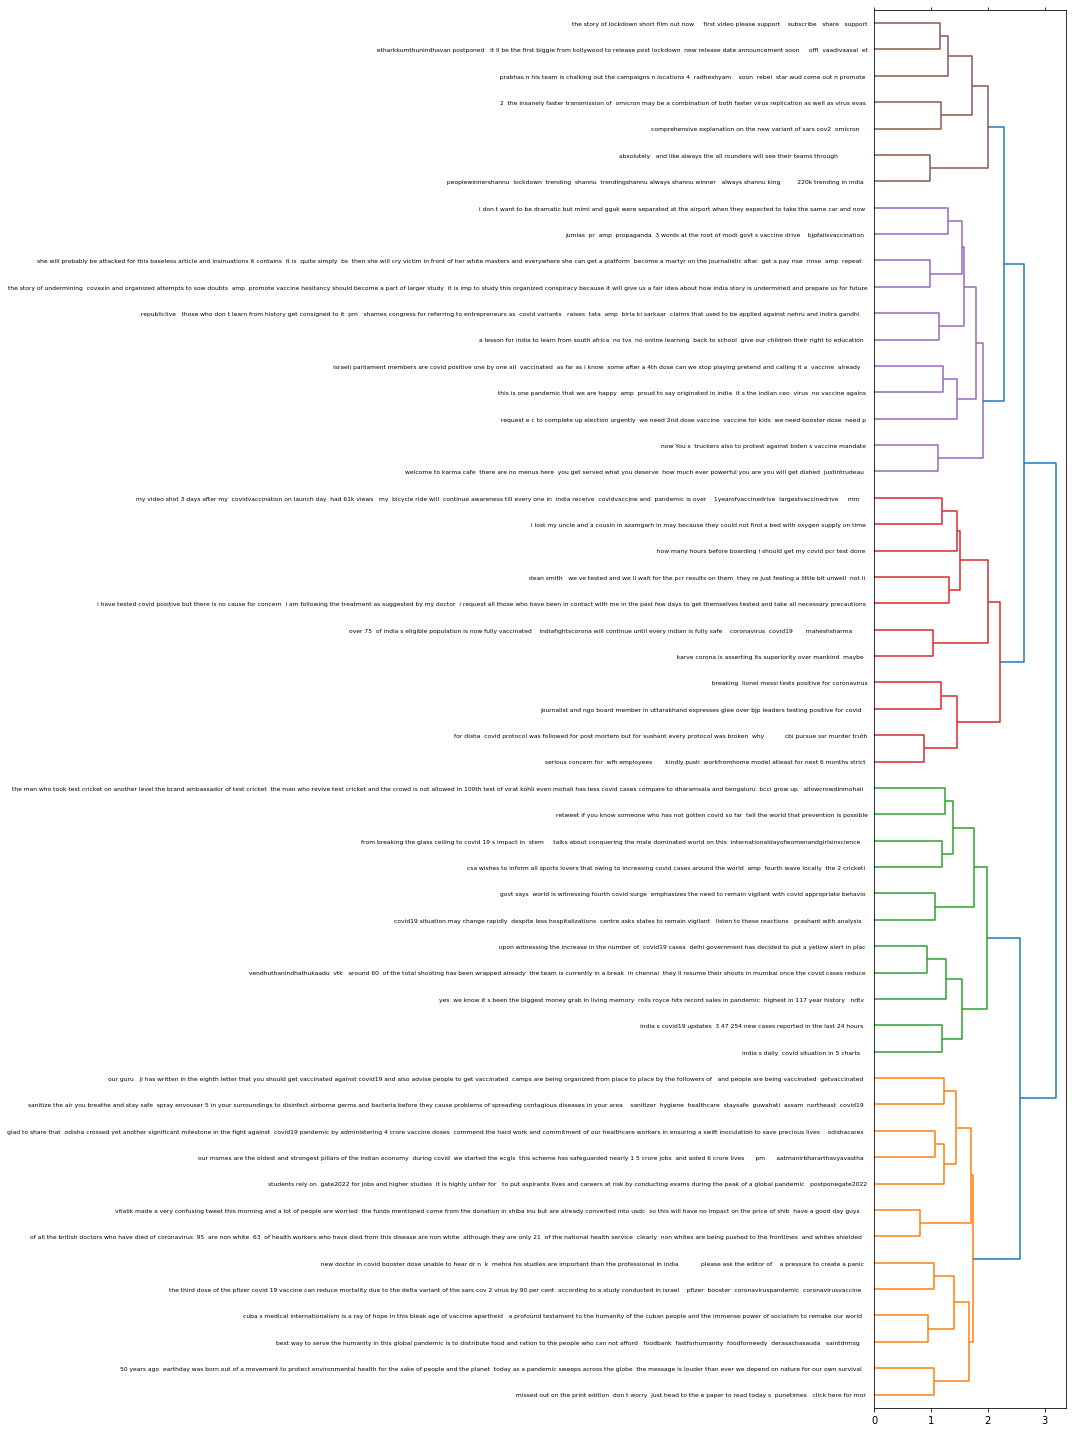

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=list(df_third['tweet'].values));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters